<a href="https://colab.research.google.com/github/wangechi-wq/Stability-of-the-Grid-system/blob/main/Stability_of_the_Grid_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importinng the dataset
energy=pd.read_csv('/content/Data_for_UCI_named.csv')
energy.head(3)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable


In [3]:
#checking the shape of the dataset
print(f'The dataset contains: {energy.shape[0]} rows and {energy.shape[1]} columns')

The dataset contains: 10000 rows and 14 columns


In [4]:
#checking for null values
energy.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

there are no null values

In [5]:
#checking the data types for the columns
energy.dtypes
     

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stab     float64
stabf     object
dtype: object

In [6]:
#checking the information about the dataset
energy.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [7]:
#checking the descriptive statistics for the dataset
energy.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [8]:
#checking correlation between the variables
energy.corr()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
tau1,1.000000,0.015586,-0.005970,-0.017265,0.027183,-0.015485,-0.015924,-0.015807,0.010521,0.015350,-0.001279,0.005494,0.275761
tau2,0.015586,1.000000,0.014273,-0.001965,-0.004769,0.006573,0.007673,-0.005963,-0.001742,0.015383,0.016508,-0.011764,0.290975
tau3,-0.005970,0.014273,1.000000,0.004354,0.016953,-0.003134,-0.008780,-0.017531,-0.011605,0.007671,0.014702,-0.011497,0.280700
tau4,-0.017265,-0.001965,0.004354,1.000000,-0.003173,0.010553,0.006169,-0.011211,-0.004149,0.008431,0.003260,-0.000491,0.278576
p1,0.027183,-0.004769,0.016953,-0.003173,1.000000,-0.573157,-0.584554,-0.579239,0.000721,0.015405,0.001069,-0.015451,0.010278
p2,-0.015485,0.006573,-0.003134,0.010553,-0.573157,1.000000,0.002388,-0.006844,0.015603,-0.018032,0.007555,0.019817,0.006255
p3,-0.015924,0.007673,-0.008780,0.006169,-0.584554,0.002388,1.000000,0.012953,-0.003219,-0.011575,-0.005897,-0.010485,-0.003321
p4,-0.015807,-0.005963,-0.017531,-0.011211,-0.579239,-0.006844,0.012953,1.000000,-0.013636,0.002850,-0.003515,0.017505,-0.020786
g1,0.010521,-0.001742,-0.011605,-0.004149,0.000721,0.015603,-0.003219,-0.013636,1.000000,0.007559,-0.005836,0.012431,0.282774
g2,0.015350,0.015383,0.007671,0.008431,0.015405,-0.018032,-0.011575,0.002850,0.007559,1.000000,-0.012809,-0.014909,0.293601


In [9]:
#drop 'stab' because of the direct relationship with 'stabf'
energy_df = energy.drop('stab', axis =1)

In [10]:
#check distribution of target variable
energy_df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [11]:
energy_df.head(3)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable


In [12]:
#get features and labels
x = energy_df.drop(columns=['stabf'])
y = energy_df['stabf']

In [13]:
#Split the dataset into an 80-20 train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [14]:
#Standard scaler
#ignore the y variable since it is an object type.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

normalised_train_df = scaler.fit_transform(x_train)
normalised_train_df = pd.DataFrame(normalised_train_df, columns = x_train.columns)

normalised_test_df = scaler.transform(x_test)
normalised_test_df = pd.DataFrame(normalised_test_df, columns = x_test.columns)

## MODELING

Random Forest

In [15]:
#train a RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

randf = RandomForestClassifier(random_state = 1)

#fit on train set
randf.fit(normalised_train_df, y_train)

#make predictions on test set
randf_pred = randf.predict(normalised_test_df)

## Evaluation the performance of the model

In [16]:
#model accuracy
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, randf_pred)
print('Accuracy: {}'.format(round(accuracy*100), 2))

#classification report
print('Classification Report:\n', classification_report(y_test,randf_pred, digits =4))

Accuracy: 93
Classification Report:
               precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



## ExtraTreesClassifier

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(random_state = 1)

#fit on the train set
etc.fit(normalised_train_df, y_train)

#predict on test set
etc_pred = etc.predict(normalised_test_df)

## Evaluating the performance

In [18]:
#model accuracy
etc_accuracy = accuracy_score(y_test, etc_pred)
print('Accuracy: {}'.format(round(etc_accuracy*100), 2))

#classification report
print('Classification Report:\n', classification_report(y_test,etc_pred, digits =4))

Accuracy: 93
Classification Report:
               precision    recall  f1-score   support

      stable     0.9410    0.8511    0.8938       712
    unstable     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000



## LightGBM Classifier

In [19]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state = 1)

#fit on train set
lgbm.fit(normalised_train_df, y_train)

#predict on test set
lgbm_pred = lgbm.predict(normalised_test_df)

## Evaluating the performance of the model

In [20]:
#model accuracy
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
print('Accuracy: {}'.format(round(lgbm_accuracy*100), 2))

#classification report
print('Classification Report:\n', classification_report(y_test,lgbm_pred, digits =4))

Accuracy: 94
Classification Report:
               precision    recall  f1-score   support

      stable     0.9297    0.8919    0.9104       712
    unstable     0.9415    0.9627    0.9520      1288

    accuracy                         0.9375      2000
   macro avg     0.9356    0.9273    0.9312      2000
weighted avg     0.9373    0.9375    0.9372      2000



# XGBoost Classifier

In [30]:
from xgboost import XGBClassifier
xbg = XGBClassifier(random_state=1)

#fit on train set
xbg.fit(normalised_train_df, y_train)

#predict on test set
xbg_pred = xbg.predict(normalised_test_df)

# Evaluating the performance

In [ ]:

#Accuracy
xbg_accuracy = accuracy_score(y_test, xbg_pred)
print('Accuracy: {}'.format(round(xbg_accuracy*100), 2))

#Classification report
print('Classification Report:\n', classification_report(y_test,xbg_pred, digits =4))

Improving the performance ofExtraTreesClassifier

In [23]:
#combination of hyperparameters
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [24]:
from sklearn.model_selection import RandomizedSearchCV

#set up randomsearch with 5folds

etc_random = RandomizedSearchCV(estimator = etc, 
                              param_distributions = hyperparameter_grid, cv=5, n_iter=10, 
                                scoring = 'accuracy', n_jobs = -1, verbose = 1,
                              random_state = 1)


In [25]:
#fit on the training data
search = etc_random.fit(normalised_train_df, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [26]:
#get best parameters
search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [27]:
#Evaluate ExtraTreesClassifier on test set using  best params
etc = ExtraTreesClassifier(max_features = None, 
                            min_samples_leaf= 8,
                            min_samples_split= 2,
                            n_estimators= 1000, 
                            random_state = 1)

#fit on train set
etc.fit(normalised_train_df, y_train)

#predict on test set
etc_pred = etc.predict(normalised_test_df)

In [28]:
#classification report for the hyperparameter tuning
print('Classification Report:\n', classification_report(y_test,etc_pred, digits =4))

Classification Report:
               precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000



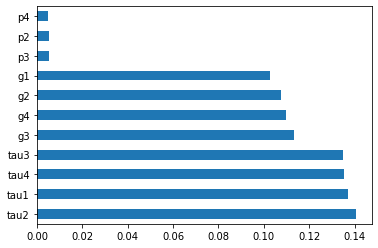

In [29]:
#plot graph of feature importance
feat_importance = pd.Series(etc.feature_importances_, index = x.columns)
feat_importance.nlargest(11).plot(kind='barh')
plt.show()